### Unzip the downloaded data

```shell
gunzip /home/q5gong/CSE185FinalProject/Figure_1e/data/GSE132440_ATAC_PeakNorm.txt.gz
```

### Install packages

In [16]:
install.packages("tidyverse")
install.packages("dplyr")

library("devtools")
install_github("jokergoo/ComplexHeatmap")

Installing package into ‘/home/q5gong/R/x86_64-conda-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)

Installing package into ‘/home/q5gong/R/x86_64-conda-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)

Warning message in install.packages("dplyr"):
“installation of package ‘dplyr’ had non-zero exit status”
Bioconductor version '3.14' is out-of-date; the current release version '3.15'
  is available with R version '4.2'; see https://bioconductor.org/install


Attaching package: ‘BiocManager’


The following object is masked from ‘package:devtools’:

    install


'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.0 (2021-05-18)

Installing package(s) 'GEOquery'

also installing the dependencies ‘R.oo’, ‘R.methodsS3’, ‘R.utils’, ‘limma’


Installation paths not writeable, unable to update packages
  path: /opt/conda/lib

### Load the libraries

In [17]:
library("DESeq2")
library("readxl")
library("dplyr")
library("circlize")
library("ComplexHeatmap")

Setting options('download.file.method.GEOquery'='auto')

Setting options('GEOquery.inmemory.gpl'=FALSE)



### ATAC Peak Normalized Data Processing
- data: `ATAC_PeakNorm.txt` 
- location: `/home/q5gong/CSE185FinalProject/Figure_1e/data/GSE132440_ATAC_PeakNorm.txt`
>- All ATAC peaks from all samples were merged by combining peaks within 500bp of each. featureCount was used to count the mapped reads for each sample. The resulting peak atlas was normalized using DESeq2.

In [3]:
data <- read.csv("/home/q5gong/CSE185FinalProject/Figure_1e/data/GSE132440_ATAC_PeakNorm.txt", sep="\t")
#                  row.name="Peaks")
head(data)
names(data)

,Peaks,D13_2_T1.Normal..C.RIK.PBS.d2.,D7_3_T1.Normal..C.RIK.PBS.d2.,D1_2_C.Ren.PBS.D2..female.,D8_2_T2.Reg.ADM..C.RIK.Caer.d2.,D8_3_T2.Reg.ADM..C.RIK.Caer.d2.,D11_1_T2.Reg.ADM..C.RIK.Caer.d2.,D14_2_C.Ren.C.d2..ADM.shRen..,D6_1_C.Ren.C.d2..ADM.shRen..,D6_3_T3.KrasG12D..KC.RIK.PBS.d2.,⋯,D19_1_T4.Tum.ADR..KC.RIK.Caer.d2.,D19_3_T4.Tum.ADR..KC.RIK.Caer.d2.,D4_2_KC.REN.C.d2..ADR.shRen..,D11_3_KC.552OFF.C.d2...ADR.sh552Off.,D2_1_T7.PDAC..KPflC.GEMMs.,D12_1_T7.PDAC..KPcr_organoids.,D12_2_T7.PDAC..KPcr_organoids.,D22_3_T7.PDAC..KPcr_organoids.,D3_2_T7.PDAC..KPR127H_shp53_orgs.,D3_3_T7.PDAC..KPR127H_Ren_orgs.
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,chr1_3001656_3001961,13.419960,5.367960,11.50487,2.645634,4.317972,6.110474,6.988018,4.69051,6.218671,⋯,5.297277,2.788978,7.399043,2.088005,12.564510,4.917989,3.185094,13.584760,6.75689,13.294766
2,chr1_3109719_3110326,9.585685,19.324655,34.51461,14.550989,12.474142,13.748566,29.564693,10.05109,9.567187,⋯,9.837801,7.669690,4.708482,4.698010,3.769353,6.762235,9.555281,81.508557,10.61797,5.908785
3,chr1_3192412_3193073,1.917137,8.588735,13.80585,8.598312,7.676395,6.110474,10.213258,12.06131,7.175390,⋯,6.810785,4.880712,6.053762,6.264014,6.282255,6.762235,11.678677,9.056506,14.47905,38.407103
4,chr1_3239108_3239709,15.337097,6.441552,32.21364,14.550989,14.393240,11.711741,10.213258,18.09197,15.785858,⋯,13.621570,16.733870,14.125445,9.396021,26.385471,11.065476,30.789239,31.697772,21.23594,29.543925
5,chr1_3351007_3351367,21.088508,7.515144,32.21364,8.598312,9.115719,7.638092,10.213258,10.05109,10.045546,⋯,11.351308,11.155913,10.089604,8.874020,15.077412,6.147486,8.493583,18.113013,33.78445,14.771963
6,chr1_3439540_3440102,13.419960,22.545431,32.21364,15.873806,14.393240,9.674917,10.213258,20.10218,9.567187,⋯,12.108062,14.642136,15.470725,8.352018,25.129020,15.983465,11.678677,18.113013,25.09702,31.021121


[1] "Peaks"                               
 [2] "D13_2_T1.Normal..C.RIK.PBS.d2."      
 [3] "D7_3_T1.Normal..C.RIK.PBS.d2."       
 [4] "D1_2_C.Ren.PBS.D2..female."          
 [5] "D8_2_T2.Reg.ADM..C.RIK.Caer.d2."     
 [6] "D8_3_T2.Reg.ADM..C.RIK.Caer.d2."     
 [7] "D11_1_T2.Reg.ADM..C.RIK.Caer.d2."    
 [8] "D14_2_C.Ren.C.d2..ADM.shRen.."       
 [9] "D6_1_C.Ren.C.d2..ADM.shRen.."        
[10] "D6_3_T3.KrasG12D..KC.RIK.PBS.d2."    
[11] "D8_1_T3.KrasG12D..KC.RIK.PBS.d2."    
[12] "D13_3_T3.KrasG12D..KC.RIK.PBS.d2."   
[13] "D7_1_T4.Tum.ADR..KC.RIK.Caer.d2."    
[14] "D18_3_T4.Tum.ADR..KC.RIK.Caer.d2."   
[15] "D19_1_T4.Tum.ADR..KC.RIK.Caer.d2."   
[16] "D19_3_T4.Tum.ADR..KC.RIK.Caer.d2."   
[17] "D4_2_KC.REN.C.d2..ADR.shRen.."       
[18] "D11_3_KC.552OFF.C.d2...ADR.sh552Off."
[19] "D2_1_T7.PDAC..KPflC.GEMMs."          
[20] "D12_1_T7.PDAC..KPcr_organoids."      
[21] "D12_2_T7.PDAC..KPcr_organoids."      
[22] "D22_3_T7.PDAC..KPcr_organoids."      
[23] "D3_2_T7.PDAC..KPR127H_shp53_orgs."   
[24] "D3_3_T7.PDAC..KPR127H_Ren_orgs."

In [4]:
# mannual column name replacement base on information of each samples 
# listed on https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE132440

names(data)[names(data) == "D1_2_C.Ren.PBS.D2..female."] <- "Normal_ATAC1"
names(data)[names(data) == "D13_2_T1.Normal..C.RIK.PBS.d2."] <- "Normal_ATAC2"
names(data)[names(data) == "D7_3_T1.Normal..C.RIK.PBS.d2."] <- "Normal_ATAC3" 
names(data)[names(data) == "D11_1_T2.Reg.ADM..C.RIK.Caer.d2."] <- "Injury_ATAC1"  
names(data)[names(data) == "D14_2_C.Ren.C.d2..ADM.shRen.."] <- "Injury_ATAC2"  
names(data)[names(data) == "D6_1_C.Ren.C.d2..ADM.shRen.."] <- "Injury_ATAC3"  
names(data)[names(data) == "D8_2_T2.Reg.ADM..C.RIK.Caer.d2."] <- "Injury_ATAC4"  
names(data)[names(data) == "D8_3_T2.Reg.ADM..C.RIK.Caer.d2."] <- "Injury_ATAC5"  
names(data)[names(data) == "D13_3_T3.KrasG12D..KC.RIK.PBS.d2."] <- "Kras_ATAC1"  
names(data)[names(data) == "D6_3_T3.KrasG12D..KC.RIK.PBS.d2."] <- "Kras_ATAC2"  
names(data)[names(data) == "D8_1_T3.KrasG12D..KC.RIK.PBS.d2."] <- "Kras_ATAC3" 
names(data)[names(data) == "D11_3_KC.552OFF.C.d2...ADR.sh552Off."] <- "KrasInjury_ATAC1"  
names(data)[names(data) == "D18_3_T4.Tum.ADR..KC.RIK.Caer.d2."] <- "KrasInjury_ATAC2"  
names(data)[names(data) == "D19_3_T4.Tum.ADR..KC.RIK.Caer.d2."] <- "KrasInjury_ATAC3"  
names(data)[names(data) == "D4_2_KC.REN.C.d2..ADR.shRen.."] <- "KrasInjury_ATAC4"  
names(data)[names(data) == "D7_1_T4.Tum.ADR..KC.RIK.Caer.d2."] <- "KrasInjury_ATAC5"  
names(data)[names(data) == "D19_1_T4.Tum.ADR..KC.RIK.Caer.d2."] <- "KrasInjury_ATAC6"  
names(data)[names(data) == "D2_1_T7.PDAC..KPflC.GEMMs."] <- "PDAC_ATAC1"  
names(data)[names(data) == "D12_1_T7.PDAC..KPcr_organoids."] <- "PDAC_ATAC2"  
names(data)[names(data) == "D12_2_T7.PDAC..KPcr_organoids."] <- "PDAC_ATAC3" 
names(data)[names(data) == "D22_3_T7.PDAC..KPcr_organoids."] <- "PDAC_ATAC4"

head(data)
names(data)

,Peaks,Normal_ATAC2,Normal_ATAC3,Normal_ATAC1,Injury_ATAC4,Injury_ATAC5,Injury_ATAC1,Injury_ATAC2,Injury_ATAC3,Kras_ATAC2,⋯,KrasInjury_ATAC6,KrasInjury_ATAC3,KrasInjury_ATAC4,KrasInjury_ATAC1,PDAC_ATAC1,PDAC_ATAC2,PDAC_ATAC3,PDAC_ATAC4,D3_2_T7.PDAC..KPR127H_shp53_orgs.,D3_3_T7.PDAC..KPR127H_Ren_orgs.
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,chr1_3001656_3001961,13.419960,5.367960,11.50487,2.645634,4.317972,6.110474,6.988018,4.69051,6.218671,⋯,5.297277,2.788978,7.399043,2.088005,12.564510,4.917989,3.185094,13.584760,6.75689,13.294766
2,chr1_3109719_3110326,9.585685,19.324655,34.51461,14.550989,12.474142,13.748566,29.564693,10.05109,9.567187,⋯,9.837801,7.669690,4.708482,4.698010,3.769353,6.762235,9.555281,81.508557,10.61797,5.908785
3,chr1_3192412_3193073,1.917137,8.588735,13.80585,8.598312,7.676395,6.110474,10.213258,12.06131,7.175390,⋯,6.810785,4.880712,6.053762,6.264014,6.282255,6.762235,11.678677,9.056506,14.47905,38.407103
4,chr1_3239108_3239709,15.337097,6.441552,32.21364,14.550989,14.393240,11.711741,10.213258,18.09197,15.785858,⋯,13.621570,16.733870,14.125445,9.396021,26.385471,11.065476,30.789239,31.697772,21.23594,29.543925
5,chr1_3351007_3351367,21.088508,7.515144,32.21364,8.598312,9.115719,7.638092,10.213258,10.05109,10.045546,⋯,11.351308,11.155913,10.089604,8.874020,15.077412,6.147486,8.493583,18.113013,33.78445,14.771963
6,chr1_3439540_3440102,13.419960,22.545431,32.21364,15.873806,14.393240,9.674917,10.213258,20.10218,9.567187,⋯,12.108062,14.642136,15.470725,8.352018,25.129020,15.983465,11.678677,18.113013,25.09702,31.021121


[1] "Peaks"                             "Normal_ATAC2"                     
 [3] "Normal_ATAC3"                      "Normal_ATAC1"                     
 [5] "Injury_ATAC4"                      "Injury_ATAC5"                     
 [7] "Injury_ATAC1"                      "Injury_ATAC2"                     
 [9] "Injury_ATAC3"                      "Kras_ATAC2"                       
[11] "Kras_ATAC3"                        "Kras_ATAC1"                       
[13] "KrasInjury_ATAC5"                  "KrasInjury_ATAC2"                 
[15] "KrasInjury_ATAC6"                  "KrasInjury_ATAC3"                 
[17] "KrasInjury_ATAC4"                  "KrasInjury_ATAC1"                 
[19] "PDAC_ATAC1"                        "PDAC_ATAC2"                       
[21] "PDAC_ATAC3"                        "PDAC_ATAC4"                       
[23] "D3_2_T7.PDAC..KPR127H_shp53_orgs." "D3_3_T7.PDAC..KPR127H_Ren_orgs."

In [5]:
# two PDAC data not found on. the website, 
# rename to PDAC_ATAC5 and PDAC_ATAC6 for now
names(data)[names(data) == "D3_2_T7.PDAC..KPR127H_shp53_orgs."] <- "PDAC_ATAC5"
names(data)[names(data) == "D3_3_T7.PDAC..KPR127H_Ren_orgs."] <- "PDAC_ATAC6"

head(data)
names(data)

,Peaks,Normal_ATAC2,Normal_ATAC3,Normal_ATAC1,Injury_ATAC4,Injury_ATAC5,Injury_ATAC1,Injury_ATAC2,Injury_ATAC3,Kras_ATAC2,⋯,KrasInjury_ATAC6,KrasInjury_ATAC3,KrasInjury_ATAC4,KrasInjury_ATAC1,PDAC_ATAC1,PDAC_ATAC2,PDAC_ATAC3,PDAC_ATAC4,PDAC_ATAC5,PDAC_ATAC6
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,chr1_3001656_3001961,13.419960,5.367960,11.50487,2.645634,4.317972,6.110474,6.988018,4.69051,6.218671,⋯,5.297277,2.788978,7.399043,2.088005,12.564510,4.917989,3.185094,13.584760,6.75689,13.294766
2,chr1_3109719_3110326,9.585685,19.324655,34.51461,14.550989,12.474142,13.748566,29.564693,10.05109,9.567187,⋯,9.837801,7.669690,4.708482,4.698010,3.769353,6.762235,9.555281,81.508557,10.61797,5.908785
3,chr1_3192412_3193073,1.917137,8.588735,13.80585,8.598312,7.676395,6.110474,10.213258,12.06131,7.175390,⋯,6.810785,4.880712,6.053762,6.264014,6.282255,6.762235,11.678677,9.056506,14.47905,38.407103
4,chr1_3239108_3239709,15.337097,6.441552,32.21364,14.550989,14.393240,11.711741,10.213258,18.09197,15.785858,⋯,13.621570,16.733870,14.125445,9.396021,26.385471,11.065476,30.789239,31.697772,21.23594,29.543925
5,chr1_3351007_3351367,21.088508,7.515144,32.21364,8.598312,9.115719,7.638092,10.213258,10.05109,10.045546,⋯,11.351308,11.155913,10.089604,8.874020,15.077412,6.147486,8.493583,18.113013,33.78445,14.771963
6,chr1_3439540_3440102,13.419960,22.545431,32.21364,15.873806,14.393240,9.674917,10.213258,20.10218,9.567187,⋯,12.108062,14.642136,15.470725,8.352018,25.129020,15.983465,11.678677,18.113013,25.09702,31.021121


[1] "Peaks"            "Normal_ATAC2"     "Normal_ATAC3"     "Normal_ATAC1"    
 [5] "Injury_ATAC4"     "Injury_ATAC5"     "Injury_ATAC1"     "Injury_ATAC2"    
 [9] "Injury_ATAC3"     "Kras_ATAC2"       "Kras_ATAC3"       "Kras_ATAC1"      
[13] "KrasInjury_ATAC5" "KrasInjury_ATAC2" "KrasInjury_ATAC6" "KrasInjury_ATAC3"
[17] "KrasInjury_ATAC4" "KrasInjury_ATAC1" "PDAC_ATAC1"       "PDAC_ATAC2"      
[21] "PDAC_ATAC3"       "PDAC_ATAC4"       "PDAC_ATAC5"       "PDAC_ATAC6"

### ATAC Peak Normalized Data Processing
- data: `ATAC_PeakNorm.txt` with accession # `GSE132440`
>- All ATAC peaks from all samples were merged by combining peaks within 500bp of each. featureCount was used to count the mapped reads for each sample. The resulting peak atlas was normalized using DESeq2.

cannot figuring out how to utilize the normalized peak data hence use the complementary data found from the paper, which consists of four excel sheet:
1. ATAC-seq-Clusters_Kmeans_peaks 
2. Injury_vs_Normal
3. KrasG12D_vs_Normal
4. KrasG12DInjury_vs_Normal
5. PDAC_vs_Normal

which sheet 2-4 is the output of DESeq result, could be used as selection for peak id and filter for peaks in `ATAC_PeakNorm.txt`

from the method:
"Dynamic ATAC peaks were called if they had an absolute log2-transformed fold change ≥ 0.58 and a FDR ≤ 0.1"

In [24]:
res1 <- data.frame(read_excel("/home/q5gong/CSE185FinalProject/Figure_1e/data/41586_2020_3147_MOESM4_ESM.xlsx",
                              sheet="Injury_vs_Normal"))

In [25]:
res2 <- data.frame(read_excel("/home/q5gong/CSE185FinalProject/Figure_1e/data/41586_2020_3147_MOESM4_ESM.xlsx",
                              sheet="KrasG12D_vs_Normal"))

In [26]:
res3 <- data.frame(read_excel("/home/q5gong/CSE185FinalProject/Figure_1e/data/41586_2020_3147_MOESM4_ESM.xlsx",
                              sheet="KrasG12DInjury_vs_Normal"))

In [27]:
res4 <- data.frame(read_excel("/home/q5gong/CSE185FinalProject/Figure_1e/data/41586_2020_3147_MOESM4_ESM.xlsx",
                              sheet="PDAC_vs_Normal"))

In [32]:
# find the significant peaks
sigPeaks <- unique(c(
  rownames(subset(res1, padj <= 0.1 & abs(log2FoldChange) >= 0.58)),
  rownames(subset(res2, padj <= 0.1 & abs(log2FoldChange) >= 0.58)),
  rownames(subset(res3, padj <= 0.1 & abs(log2FoldChange) >= 0.58)),
  rownames(subset(res4, padj <= 0.1 & abs(log2FoldChange) >= 0.58))
))

In [33]:
dynamicPeaks <- data[sigPeaks,]
dynamicPeaks

,Peaks,Normal_ATAC2,Normal_ATAC3,Normal_ATAC1,Injury_ATAC4,Injury_ATAC5,Injury_ATAC1,Injury_ATAC2,Injury_ATAC3,Kras_ATAC2,⋯,KrasInjury_ATAC6,KrasInjury_ATAC3,KrasInjury_ATAC4,KrasInjury_ATAC1,PDAC_ATAC1,PDAC_ATAC2,PDAC_ATAC3,PDAC_ATAC4,PDAC_ATAC5,PDAC_ATAC6
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,chr1_3001656_3001961,13.419960,5.367960,11.504871,2.645634,4.317972,6.110474,6.988018,4.690510,6.218671,⋯,5.297277,2.788978,7.399043,2.088005,12.564510,4.917989,3.185094,13.584760,6.75689,13.294766
2,chr1_3109719_3110326,9.585685,19.324655,34.514614,14.550989,12.474142,13.748566,29.564693,10.051092,9.567187,⋯,9.837801,7.669690,4.708482,4.698010,3.769353,6.762235,9.555281,81.508557,10.61797,5.908785
3,chr1_3192412_3193073,1.917137,8.588735,13.805846,8.598312,7.676395,6.110474,10.213258,12.061311,7.175390,⋯,6.810785,4.880712,6.053762,6.264014,6.282255,6.762235,11.678677,9.056506,14.47905,38.407103
4,chr1_3239108_3239709,15.337097,6.441552,32.213640,14.550989,14.393240,11.711741,10.213258,18.091966,15.785858,⋯,13.621570,16.733870,14.125445,9.396021,26.385471,11.065476,30.789239,31.697772,21.23594,29.543925
5,chr1_3351007_3351367,21.088508,7.515144,32.213640,8.598312,9.115719,7.638092,10.213258,10.051092,10.045546,⋯,11.351308,11.155913,10.089604,8.874020,15.077412,6.147486,8.493583,18.113013,33.78445,14.771963
6,chr1_3439540_3440102,13.419960,22.545431,32.213640,15.873806,14.393240,9.674917,10.213258,20.102184,9.567187,⋯,12.108062,14.642136,15.470725,8.352018,25.129020,15.983465,11.678677,18.113013,25.09702,31.021121
7,chr1_3472098_3472485,13.419960,13.956695,11.504871,6.614086,9.115719,11.711741,7.525558,11.391238,6.218671,⋯,14.378324,13.944891,16.143366,11.484025,22.616118,6.147486,13.802073,4.528253,35.71499,25.112336
8,chr1_3483466_3484374,19.171371,15.030287,43.718512,15.873806,14.393240,22.914277,21.501595,21.442330,20.569451,⋯,33.297171,20.220092,26.905609,25.578056,113.080589,71.925591,107.231489,36.226025,177.60968,295.439251
9,chr1_3504349_3507468,86.271168,73.004252,96.640920,81.353258,120.423445,145.123753,117.183694,113.912378,195.170608,⋯,245.945013,317.943521,276.455136,266.742586,589.275512,504.708633,496.874623,235.469165,930.52028,1605.712331


In [36]:
# z-score
row.names(dynamicPeaks) <- dynamicPeaks$Peaks
dynamicPeaks <- subset(dynamicPeaks, select = -c(Peaks))
scaled_dPeaks = t(scale(t(dynamicPeaks)))
scaled_dPeaks

,Normal_ATAC2,Normal_ATAC3,Normal_ATAC1,Injury_ATAC4,Injury_ATAC5,Injury_ATAC1,Injury_ATAC2,Injury_ATAC3,Kras_ATAC2,Kras_ATAC3,⋯,KrasInjury_ATAC6,KrasInjury_ATAC3,KrasInjury_ATAC4,KrasInjury_ATAC1,PDAC_ATAC1,PDAC_ATAC2,PDAC_ATAC3,PDAC_ATAC4,PDAC_ATAC5,PDAC_ATAC6
chr1_3001656_3001961,1.685134056,-0.40922422,1.1870118,-1.11731223,-0.68233031,-0.21609324,0.012159721,-0.585431758,-0.18795062,0.59100719,⋯,-0.427609031,-1.080027904,0.11906879,-1.26235404,1.4626281,-0.52626342,-0.97699664,1.727999216,-0.04795774,1.6525708
chr1_3109719_3110326,-0.272254427,0.31441080,1.2294379,0.02685022,-0.09825687,-0.02148689,0.931259886,-0.244218813,-0.27336877,-0.33432019,⋯,-0.257067278,-0.387671949,-0.56605202,-0.56668280,-0.6226241,-0.44233609,-0.27408594,4.060303304,-0.21007070,-0.4937470
chr1_3192412_3193073,-1.023285980,-0.08530999,0.6481760,-0.08396364,-0.21357814,-0.43373473,0.143085474,0.402907652,-0.28401562,-0.27505144,⋯,-0.335276313,-0.606629897,-0.44170797,-0.41214818,-0.4095836,-0.34210206,0.34911228,-0.019544969,0.74282341,4.1069256
chr1_3239108_3239709,-0.204041249,-1.31579858,1.9051742,-0.30228826,-0.32200356,-0.65713492,-0.844414091,0.140259876,-0.14795544,-0.47587152,⋯,-0.418446251,-0.029473806,-0.35547240,-0.94655165,1.1767748,-0.73790467,1.72715387,1.840701491,0.53319096,1.5715156
chr1_3351007_3351367,1.130578624,-0.65253729,2.5920734,-0.51024283,-0.44227170,-0.63638567,-0.298089404,-0.319392888,-0.32012148,-0.60233984,⋯,-0.148585122,-0.174253953,-0.31433370,-0.47402345,0.3409084,-0.83220471,-0.52400088,0.739691546,2.79842868,0.3007820
chr1_3439540_3440102,-0.415614435,0.92374585,2.3427647,-0.05545933,-0.27276441,-0.96528045,-0.886267291,0.565146604,-0.98109219,-0.26028006,⋯,-0.608163751,-0.236233623,-0.11462018,-1.15944443,1.3029434,-0.03936461,-0.67118530,0.273192637,1.29824676,2.1677368
chr1_3472098_3472485,0.010004837,0.08563864,-0.2598587,-0.94904096,-0.59652478,-0.23070773,-0.820601353,-0.275871330,-1.00476059,0.06640387,⋯,0.145052195,0.083975296,0.39377206,-0.26279624,1.3058762,-1.01479157,0.06385012,-1.242964900,3.15169634,1.6576295
chr1_3483466_3484374,-0.489074671,-0.55118759,-0.1208873,-0.53853548,-0.56074278,-0.43293409,-0.454123179,-0.455012109,-0.46810459,-0.49036968,⋯,-0.277199031,-0.473344690,-0.37306731,-0.39297954,0.9194881,0.30219619,0.83175627,-0.233268570,1.88737250,3.6547213
chr1_3504349_3507468,-0.677690783,-0.71607902,-0.6476856,-0.69192091,-0.57887010,-0.50739899,-0.588244423,-0.597710077,-0.36258684,-0.40745992,⋯,-0.215669515,-0.007339576,-0.12738752,-0.15549108,0.7777680,0.53307112,0.51040317,-0.245981707,1.76517044,3.7188598
chr1_3524631_3525910,-1.155620746,-0.75560062,-0.3794327,-0.86325726,-0.95020158,-1.08050262,-0.953860984,-0.741245551,0.12560094,-0.39710114,⋯,-0.177727456,0.300259925,0.31593722,0.04422346,0.5409711,0.34100312,0.23564220,-0.525315955,2.58833094,2.6555633


In [61]:
# clustering 
group = kmeans(scaled_dPeaks, centers = 6)$cluster

### Visualization

In [64]:
# Change Jupyter plots size
options(repr.plot.width=8, repr.plot.height=12)

column_category = c(rep("1Normal",3), rep("2Injury",5),
                    rep("3Kras",3), rep("4KrasInjury",6),
                    rep("5PDAC",6))

anno_color = c("#FFC300", "red", "#B60000", "#A9A9A9 ", "#AC4B4B")
palette = colorRamp2(c(-2, 0, 2), c("#85C1E9", "white", "#FF5757"))

Heatmap(scaled_dPeaks, row_km=6, cluster_columns=FALSE, 
        column_title=c("Normal", "Injury", "Kras", 
                       "KrasInjury", "PDAC"),
        show_row_names = FALSE, show_column_names=FALSE, 
        width=unit(5.5, "in"), height=unit(10, "in"), col=palette,
        top_annotation = HeatmapAnnotation(foo = anno_block(gp = gpar(fill = anno_color))))

`use_raster` is automatically set to TRUE for a matrix with more than
2000 rows. You can control `use_raster` argument by explicitly setting
TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### Backup plan: directly used processed data

In [ ]:
excel <- read_excel("/home/q5gong/CSE185FinalProject/Figure_1e/data/41586_2020_3147_MOESM4_ESM.xlsx",
                    sheet="ATAC-seq-Clusters_Kmeans_peaks")
peak <- data.frame(excel)
# rownames(peak) <- peak$region
# peak <- subset(peak, select=-c(region))
names(peak)[names(peak) == "region"] <- "Peaks"

In [9]:
pdac <- subset(data, select=c(Peaks, PDAC_ATAC1,PDAC_ATAC2,PDAC_ATAC3,
                              PDAC_ATAC4,PDAC_ATAC5,PDAC_ATAC6))

peak_all <- inner_join(peak, pdac, by ="Peaks")
peak_all

Peaks,cluster..kmean.,Normal_ATAC2,Normal_ATAC3,Normal_ATAC1,Injury_ATAC4,Injury_ATAC5,Injury_ATAC1,Injury_ATAC2,Injury_ATAC3,⋯,distanceToTSS,ENSEMBL,SYMBOL,GENENAME,PDAC_ATAC1,PDAC_ATAC2,PDAC_ATAC3,PDAC_ATAC4,PDAC_ATAC5,PDAC_ATAC6
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr11_105287760_105288157,A1,78.60262,54.75319,23.00974,115.74650,80.12237,47.35617,69.88018,74.37808,⋯,29892,ENSMUSG00000078627,43900,membrane-associated ring finger (C3HC4) 10,6.282255,5.532738,6.370187,4.528253,7.72216,4.431589
chr11_105237002_105237667,A1,170.62520,152.45005,119.65066,123.68341,86.35944,45.82855,59.66693,95.15034,⋯,80382,ENSMUSG00000078627,43900,membrane-associated ring finger (C3HC4) 10,3.769353,13.524470,7.431885,18.113013,4.82635,5.908785
chr11_87367841_87369012,A1,126.53105,125.61026,48.32046,129.63609,124.74142,100.31361,99.98242,122.62332,⋯,-22912,ENSMUSG00000020486,44078,septin 4,40.206432,32.581678,16.987167,49.810785,45.36769,33.975514
chr11_117186955_117188602,A1,82.43689,67.63629,69.02923,60.18818,60.93138,54.99426,49.45367,40.20437,⋯,-4427,ENSMUSG00000059248,44083,septin 9,41.462883,60.245367,61.578479,99.621570,25.09702,20.680748
chr11_117096561_117097605,A1,55.59698,97.69687,48.32046,44.97578,57.57296,47.86538,63.42971,58.29633,⋯,-29955,ENSMUSG00000059248,44083,septin 9,52.770941,101.433525,107.231489,63.395544,49.22877,39.884299
chr4_41453353_41454874,A1,277.98488,271.61876,209.38866,228.18597,165.04249,190.95231,169.86260,205.71235,⋯,0,ENSMUSG00000028441,1110017D15Rik,RIKEN cDNA 1110017D15 gene,86.695118,129.097214,77.503948,163.017114,108.11024,93.063364
chr19_21673299_21673946,A1,95.85685,60.12115,59.82533,42.99156,36.46288,35.64443,31.71485,44.22481,⋯,53335,ENSMUSG00000035171,1110059E24Rik,RIKEN cDNA 1110059E24 gene,7.538706,17.212962,16.987167,18.113013,12.54851,13.294766
chr18_61887851_61889189,A1,289.48770,185.73140,119.65066,163.36792,141.05376,139.52249,137.61021,132.00434,⋯,1808,ENSMUSG00000098702,1500015A07Rik,RIKEN cDNA 1500015A07 gene,52.770941,31.966929,27.604146,18.113013,34.74972,25.112336
chr10_79637588_79638600,A1,93.93972,93.40250,64.42728,71.43213,62.37071,53.46665,53.21645,58.29633,⋯,1900,ENSMUSG00000035595,1600002K03Rik,RIKEN cDNA 1600002K03 gene,30.154824,71.310842,47.776406,45.282532,27.02756,22.157944


In [10]:
# modified column name 
names(peak_all)[names(peak_all) == "cluster..kmean."] <- "cluster_kmean"
names(peak_all)[names(peak_all) == "Kras._ATAC1"]<- "Kras_ATAC1"
names(peak_all)[names(peak_all) == "Kras._ATAC2"]<- "Kras_ATAC2"
names(peak_all)[names(peak_all) == "Kras._ATAC3"]<- "Kras_ATAC3"
names(peak_all)[names(peak_all) == "Kras..Injury_ATAC1"]<- "KrasInjury_ATAC1"
names(peak_all)[names(peak_all) == "Kras..Injury_ATAC2"]<- "KrasInjury_ATAC2"
names(peak_all)[names(peak_all) == "Kras..Injury_ATAC3"]<- "KrasInjury_ATAC3"
names(peak_all)[names(peak_all) == "Kras..Injury_ATAC4"]<- "KrasInjury_ATAC4"
names(peak_all)[names(peak_all) == "Kras..Injury_ATAC5"]<- "KrasInjury_ATAC5"
names(peak_all)[names(peak_all) == "Kras..Injury_ATAC6"]<- "KrasInjury_ATAC6"

kmean <- subset(peak_all, select=c(cluster_kmean))
peakdata <- subset(peak_all, select=-c(Peaks, cluster_kmean,
                                       annotation, distanceToTSS, 
                                       ENSEMBL, SYMBOL, GENENAME))
names(peakdata)
peakdata

[1] "Normal_ATAC2"     "Normal_ATAC3"     "Normal_ATAC1"     "Injury_ATAC4"    
 [5] "Injury_ATAC5"     "Injury_ATAC1"     "Injury_ATAC2"     "Injury_ATAC3"    
 [9] "Kras_ATAC2"       "Kras_ATAC3"       "Kras_ATAC1"       "KrasInjury_ATAC5"
[13] "KrasInjury_ATAC2" "KrasInjury_ATAC6" "KrasInjury_ATAC3" "KrasInjury_ATAC4"
[17] "KrasInjury_ATAC1" "PDAC_ATAC1"       "PDAC_ATAC2"       "PDAC_ATAC3"      
[21] "PDAC_ATAC4"       "PDAC_ATAC5"       "PDAC_ATAC6"

,Normal_ATAC2,Normal_ATAC3,Normal_ATAC1,Injury_ATAC4,Injury_ATAC5,Injury_ATAC1,Injury_ATAC2,Injury_ATAC3,Kras_ATAC2,Kras_ATAC3,⋯,KrasInjury_ATAC6,KrasInjury_ATAC3,KrasInjury_ATAC4,KrasInjury_ATAC1,PDAC_ATAC1,PDAC_ATAC2,PDAC_ATAC3,PDAC_ATAC4,PDAC_ATAC5,PDAC_ATAC6
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,78.60262,54.75319,23.00974,115.74650,80.12237,47.35617,69.88018,74.37808,41.617262,28.298496,⋯,18.162093,25.100804,16.816006,17.226038,6.282255,5.532738,6.370187,4.528253,7.72216,4.431589
2,170.62520,152.45005,119.65066,123.68341,86.35944,45.82855,59.66693,95.15034,45.444137,49.357841,⋯,25.729632,29.981516,28.923530,20.358045,3.769353,13.524470,7.431885,18.113013,4.82635,5.908785
3,126.53105,125.61026,48.32046,129.63609,124.74142,100.31361,99.98242,122.62332,79.407649,70.417187,⋯,60.540311,49.504364,82.062109,72.036158,40.206432,32.581678,16.987167,49.810785,45.36769,33.975514
4,82.43689,67.63629,69.02923,60.18818,60.93138,54.99426,49.45367,40.20437,50.227730,53.964573,⋯,39.351202,30.678761,24.887689,32.364071,41.462883,60.245367,61.578479,99.621570,25.09702,20.680748
5,55.59698,97.69687,48.32046,44.97578,57.57296,47.86538,63.42971,58.29633,44.009059,47.383528,⋯,29.513402,32.770494,27.578250,30.276067,52.770941,101.433525,107.231489,63.395544,49.22877,39.884299
6,277.98488,271.61876,209.38866,228.18597,165.04249,190.95231,169.86260,205.71235,186.081781,163.209929,⋯,147.567007,198.714701,88.788511,157.122345,86.695118,129.097214,77.503948,163.017114,108.11024,93.063364
7,95.85685,60.12115,59.82533,42.99156,36.46288,35.64443,31.71485,44.22481,27.744841,31.589018,⋯,17.405339,25.798049,20.851847,16.182036,7.538706,17.212962,16.987167,18.113013,12.54851,13.294766
8,289.48770,185.73140,119.65066,163.36792,141.05376,139.52249,137.61021,132.00434,113.371162,88.186010,⋯,69.621357,96.916994,76.680987,76.734169,52.770941,31.966929,27.604146,18.113013,34.74972,25.112336
9,93.93972,93.40250,64.42728,71.43213,62.37071,53.46665,53.21645,58.29633,45.444137,53.306469,⋯,60.540311,49.504364,28.923530,34.974077,30.154824,71.310842,47.776406,45.282532,27.02756,22.157944


In [11]:
scaled_peak = t(scale(t(peakdata)))
scaled_peak

,Normal_ATAC2,Normal_ATAC3,Normal_ATAC1,Injury_ATAC4,Injury_ATAC5,Injury_ATAC1,Injury_ATAC2,Injury_ATAC3,Kras_ATAC2,Kras_ATAC3,⋯,KrasInjury_ATAC6,KrasInjury_ATAC3,KrasInjury_ATAC4,KrasInjury_ATAC1,PDAC_ATAC1,PDAC_ATAC2,PDAC_ATAC3,PDAC_ATAC4,PDAC_ATAC5,PDAC_ATAC6
1,1.4270383,0.6476636,-0.3896793,2.6408620,1.47670220,0.40593676,1.141998140,1.2889848,0.21839513,-0.21684836,⋯,-0.54809548,-0.32134560,-0.5920842,-0.57868480,-0.93631629,-0.9608097,-0.93344275,-0.9936353,-0.889261686,-0.9967941
2,2.4139664,2.0429961,1.3735322,1.4558440,0.69402974,-0.13324061,0.149212500,0.8734595,-0.14108689,-0.06120481,⋯,-0.54347692,-0.45669230,-0.4782867,-0.65311564,-0.99170513,-0.7925948,-0.91694969,-0.6989387,-0.970130913,-0.9480375
3,1.4966460,1.4704404,-0.7292163,1.5850150,1.44571337,0.75050150,0.741075753,1.3854328,0.15552076,-0.10034653,⋯,-0.38144104,-0.69552252,0.2310663,-0.05427084,-0.96014037,-1.1771398,-1.62095737,-0.6868018,-0.813251688,-1.1374714
4,1.6916795,0.9257512,0.9978354,0.5403130,0.57877351,0.27152871,-0.015196035,-0.4938455,0.02486148,0.21824239,⋯,-0.53799674,-0.98679389,-1.2864808,-0.89957941,-0.42871768,0.5432722,0.61226053,2.5809831,-1.275647901,-1.5041891
5,0.1046341,2.0140374,-0.2253858,-0.3770806,0.19425323,-0.24602562,0.459880674,0.2270612,-0.42092558,-0.26787952,⋯,-1.07836327,-0.93064070,-1.1661304,-1.04377327,-0.02353815,2.1835103,2.44647177,0.4583313,-0.184190204,-0.6080004
6,1.9198204,1.8072058,0.7063747,1.0388932,-0.07809521,0.38024138,0.007171072,0.6413420,0.29408329,-0.11051265,⋯,-0.38723105,0.51755571,-1.4270043,-0.21820010,-1.46403580,-0.7139559,-1.62662474,-0.1139235,-1.085208978,-1.3513835
7,3.1986706,1.4384717,1.4239009,0.5947362,0.27315916,0.23284581,0.039290421,0.6554810,-0.15625658,0.03309232,⋯,-0.66553938,-0.25214784,-0.4957781,-0.72579446,-1.15153054,-0.6750151,-0.68613690,-0.6306822,-0.904767499,-0.8680099
8,3.0421396,1.3789728,0.3197281,1.0204962,0.66281012,0.63826454,0.607611608,0.5177521,0.21907057,-0.18463611,⋯,-0.48221916,-0.04468235,-0.3690565,-0.36820399,-0.75232376,-1.0858027,-1.15573619,-1.3078748,-1.041195850,-1.1956788
9,2.2186089,2.1899748,0.6455753,1.0189386,0.53595856,0.06136575,0.048030033,0.3187916,-0.36623964,0.05282819,⋯,0.43839708,-0.14982666,-1.2467996,-0.92430120,-1.18117079,1.0124740,-0.24192804,-0.3748533,-1.347856157,-1.6074101
10,1.1378540,0.5834900,-0.2134000,2.4234960,2.05800841,1.43830323,0.233432120,0.7164264,0.01775843,-0.42807325,⋯,-0.86653603,-0.55918579,-1.1227578,-0.69640453,-1.12502782,0.6617148,-0.33010017,-0.9139461,-0.399171904,-0.8430188


'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



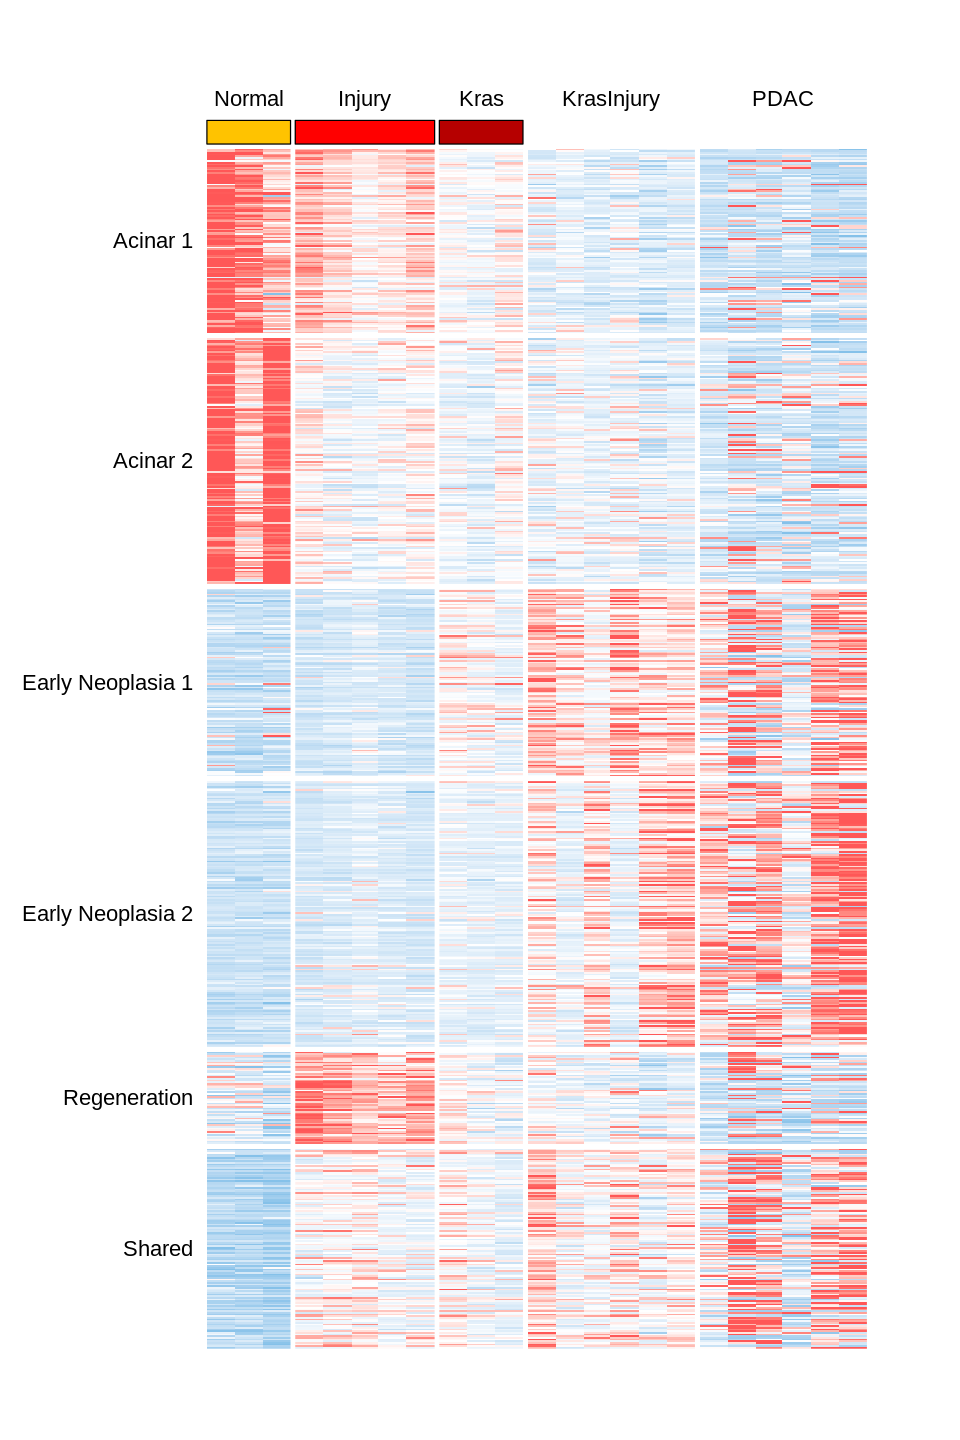

In [12]:
# Change Jupyter plots size
options(repr.plot.width=8, repr.plot.height=12)

column_category = c(rep("1Normal",3), rep("2Injury",5),
                    rep("3Kras",3), rep("4KrasInjury",6),
                    rep("5PDAC",6))

anno_color = c("#FFC300", "red", "#B60000", "#A9A9A9 ", "#AC4B4B")
palette = colorRamp2(c(-2, 0, 2), c("#85C1E9", "white", "#FF5757"))

Heatmap(scaled_peak, name="z-score", use_raster=TRUE,
        row_split=kmean, column_split=column_category,
        row_title=c("Acinar 1", "Acinar 2", 
                    "Early Neoplasia 1", "Early Neoplasia 2",
                    "Regeneration", "Shared"),
        column_title=c("Normal", "Injury", "Kras", 
                       "KrasInjury", "PDAC"),
        row_order=rownames(scaled_peak), row_title_rot=0, 
        column_order=names(scaled_peak), 
        show_row_names = FALSE, show_column_names=FALSE, 
        width=unit(5.5, "in"), height=unit(10, "in"), col=palette,
        top_annotation = HeatmapAnnotation(foo = anno_block(gp = gpar(fill = anno_color))))